In [1]:
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

Предположим, мы взвешиваем одинаковые груши (х) и яблоки (y). Оцените их вес, если мы делаем три взвешивания:
#### x+2y=500
#### 3x+y=750
#### 2x+2y=700

составим матрицу

In [2]:
A = np.array([[1, 2], [3, 1], [2, 2]])
b = np.array([500, 750, 700])
A, b

(array([[1, 2],
        [3, 1],
        [2, 2]]), array([500, 750, 700]))

для начала посмотрим, совместная сисема или нет, для этого найдем определитель

In [3]:
m = np.array([[1, 2, 500], [3, 1, 750], [2, 2, 700]])

In [4]:
np.linalg.det(m)

0.0

как видим, определитель=0, значит система совместная и имеет решение.

решим ее

In [5]:
np.linalg.lstsq(A, b)[0]

c:\users\днш\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



array([200., 150.])

Итак, решение системы Х=200, Y=150

посмотрим на это графически

In [6]:
x = np.linspace(180, 220)

In [7]:
line1 = go.Scatter(x=x, y=(500-x)/2)
line2 = go.Scatter(x=x, y=(750-3*x))
line3 = go.Scatter(x=x, y=(700-2*x)/2)
fig = go.Figure([line1, line2, line3])
iplot(fig)

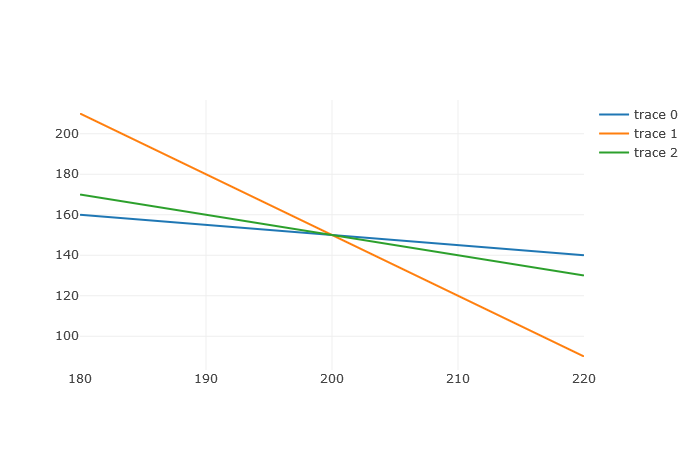

In [8]:
from IPython.display import Image
from IPython.core.display import HTML
Image('newplot.png')

#### Как изменится ответ, если результат последнего взвешивания будет не 700, а 650 (г)?
х+2у=500 
3х+у=750
2х+2у=650

Посмотрим на определитель

In [9]:
m = np.array([[1, 2, 500], [3, 1, 750], [2, 2, 650]])
np.linalg.det(m)

249.9999999999999

как мы видим, определитель не равен 0, значит система несовместна, ищем псевдорешение

In [10]:
A = np.array([[1, 2], [3, 1], [2, 2]])
b = np.array([500, 750, 650])

In [11]:
solve = np.linalg.lstsq(A, b, rcond=None)
print('X = ', solve[0][0])
print('Y = ', solve[0][1])

X =  200.0
Y =  138.88888888888903


### Поменяем третье взвешивание еще раз:
х+2у=500 
3х+у=750
2х+3у=700

In [12]:
A = np.array([[1, 2], [3, 1], [2, 3]])
b = np.array([500, 750, 700])

Посмотрим на определитель

In [13]:
np.linalg.det(np.c_[A, b])

749.9999999999999

как видим и эта система несовместна

In [14]:
solve = np.linalg.lstsq(A, b, rcond=None)
print('X = ', solve[0][0])
print('Y = ', solve[0][1])

X =  209.9999999999999
Y =  110.00000000000009


### Как изменится решение, если добавить 4-е взвешивание?
х+2у=500 
3х+у=750
2х+3у=700
х+5у=850

In [15]:
A = np.array([[1, 2], [3, 1], [2, 3], [1, 5]])
b = np.array([500, 750, 700, 800])

In [16]:
solve = np.linalg.lstsq(A, b, rcond=None)
print('X = ', solve[0][0])
print('Y = ', solve[0][1])

X =  205.01519756838903
Y =  117.17325227963532


### Предположим, мы взвешиваем  груши (х),  яблоки (y) и сливы (z). При этом, у нас есть дополнительная априорная информация о предполагаемом весе фруктов: предварительная оценка веса груши ~150, яблока у~100,  а сливы z~50?.  Оцените вес яблок, груш и слив:
#### х+2у+5z=550
#### 3х+у+3z=800

In [17]:
A = np.array([[1,2,5],[3,1,3]])
b = np.array([550,800])

In [18]:
solve = np.linalg.lstsq(A, b, rcond=None)
print('X = ', solve[0][0])
print('Y = ', solve[0][1])
print('Z = ', solve[0][2])

X =  196.76470588235293
Y =  11.176470588235262
Z =  66.17647058823522


####  x = 550-2y-5z
#### 3(550-2y-5z)+y+3z = 800
#### 1650 -6y-15z+y+3z = 800
#### -5y-12z = 800-1650 = -850
#### 5y+12z = 850
### Т.о. решаем одно уравнение с 2мя неизвестными 
#### z = (850-5y)/12

In [19]:
def Q(x,y):
    return(x**2+y**2)

In [20]:
x = np.linspace(20,30)
y = (850-5*x)/12

In [21]:
trace = go.Scatter(x = x, y = Q(x,(850-5*x)/12))
data = [trace]
iplot(data)

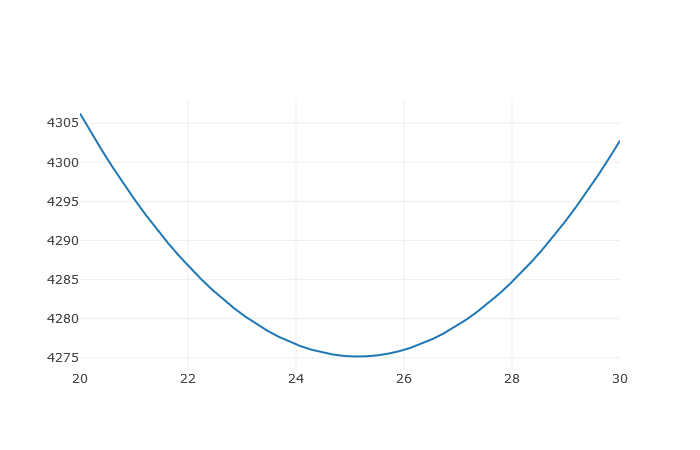

In [22]:
Image('newplot2.png')

### Решите систему:
#### х+2у=10 
#### 1.05х+2.1у=12

In [23]:
A = np.array([[1,2],[1.05,2.1]])
b = np.array([10,12])

In [24]:
solve = np.linalg.lstsq(A, b, rcond=None)
print('X = ', solve[0][0])
print('Y = ', solve[0][1])

X =  2.149821640903685
Y =  4.299643281807371


In [25]:
x = np.linspace(1,2)

In [26]:
trace_1 = go.Scatter(x = x, y = (10-x)/2)
trace_2 = go.Scatter(x = x, y = (12-1.05*x)/2.1)
data = [trace_1, trace_2]
iplot(data)

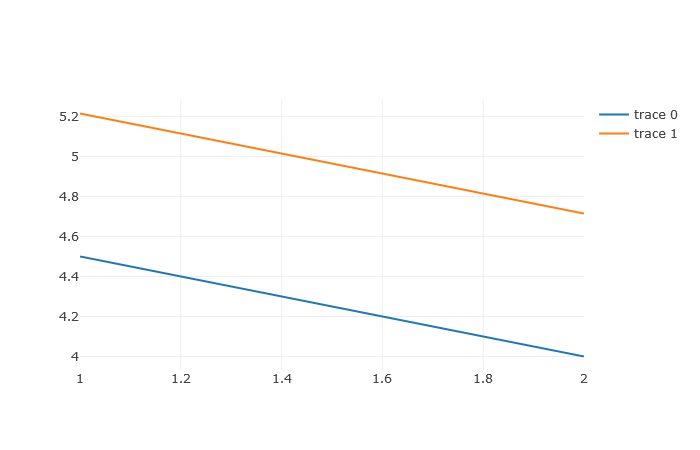

In [27]:
Image('newplot(1).png')